<a href="https://colab.research.google.com/github/zxzhaixiang/MachineLearning_demo/blob/master/gaussian_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
n = 50
Xtest = np.linspace(-5,5,n).reshape(-1,1)

## Define kernal function. use RBF

In [0]:
def kernel(X1,X2,param):
    sqdist = (X1-X2.T)**2
    return np.exp(-.5*sqdist/param)

In [0]:
param = 0.5
K_ss = kernel(Xtest, Xtest, param)

Get cholesky decomposition (square root) of the covariance matrix

Because $K$ is a covariant matrix, it is semi-definite symmetric matrix. And it is possible to write $K=LL^T$. $L$ is the cholesky decomposition of $K$.

Since the prior distribution of $y$ follows $\mathbf{y}\sim\mathcal{N}(0, K)=\mathcal{N}(0, LL^T)$, $\mathbf{z}\equiv L^{-1}\mathbf{y}\sim \mathbf{N}(0,\mathbf{I})$, the prior distribution can be sampled via $\mathbf{y} = L\mathbf{z}$, where $\mathbf{z}\sim\mathcal{N}(0,\mathbf{I})$.


In [0]:
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))

In [0]:
y_prior = L.dot(np.random.normal(size=(n, 5)))

Text(0.5, 1.0, 'A few function sample from GP prior')

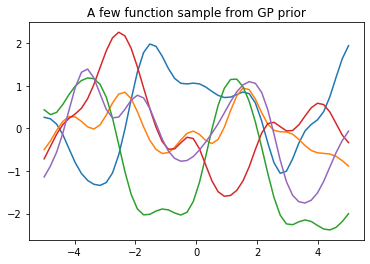

In [0]:
plt.plot(Xtest, y_prior)
plt.title('A few function sample from GP prior')

## Noiseless training data

In [0]:
Xtrain = np.array([-4,-3.5,-3,-2.5,-2,-1.5,-1,0,1,2,3,4]).reshape(-1,1)
ytrain = np.cos(Xtrain)

In [0]:
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 1e-15*np.eye(len(Xtrain)))

In [0]:
K_s = kernel(Xtrain, Xtest, param)
print(K_s.shape)
Lk = np.linalg.solve(L, K_s)

(12, 50)


$\mathbf{K} = \begin{pmatrix} \mathbf{K}_{ss} & \mathbf{K}_s^T \\ \mathbf{K}_s & \mathbf{K} \end{pmatrix}$

$\mathbf{K} = LL^T$

In [0]:
# compute the mean at test point
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

In [0]:
# compute the std at test point
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

In [0]:
# draw samples from the posterior at test points
L= np.linalg.cholesky(K_ss + 1e-15*np.eye(n) - np.dot(Lk.T, Lk))
y_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

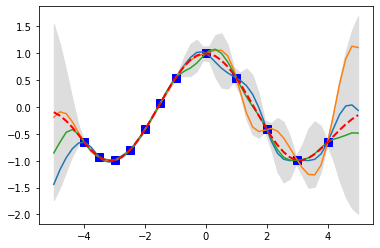

In [0]:
plt.plot(Xtrain,ytrain,'bs', ms=8)
plt.plot(Xtest, y_post)
plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color = '#dddddd')
plt.plot(Xtest, mu, 'r--', lw=2)